# Iris / Decision Tree

In [3]:
import pandas as pd
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [5]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["target"] = data.target
df["target_name"] = df["target"]
df["target_name"] = df["target_name"].apply(lambda x: data.target_names[x])
df.sample(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
130,7.4,2.8,6.1,1.9,2,virginica
135,7.7,3.0,6.1,2.3,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
111,6.4,2.7,5.3,1.9,2,virginica
39,5.1,3.4,1.5,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
86,6.7,3.1,4.7,1.5,1,versicolor
69,5.6,2.5,3.9,1.1,1,versicolor
68,6.2,2.2,4.5,1.5,1,versicolor
114,5.8,2.8,5.1,2.4,2,virginica


## Train / Test Split

In [6]:
X = df.drop(columns=["target", "target_name"])
y = df["target_name"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Train Shape: {X_train.shape}")
print(f"Test Shape: {X_test.shape}")

Train Shape: (120, 4)
Test Shape: (30, 4)


## Training

In [7]:
model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

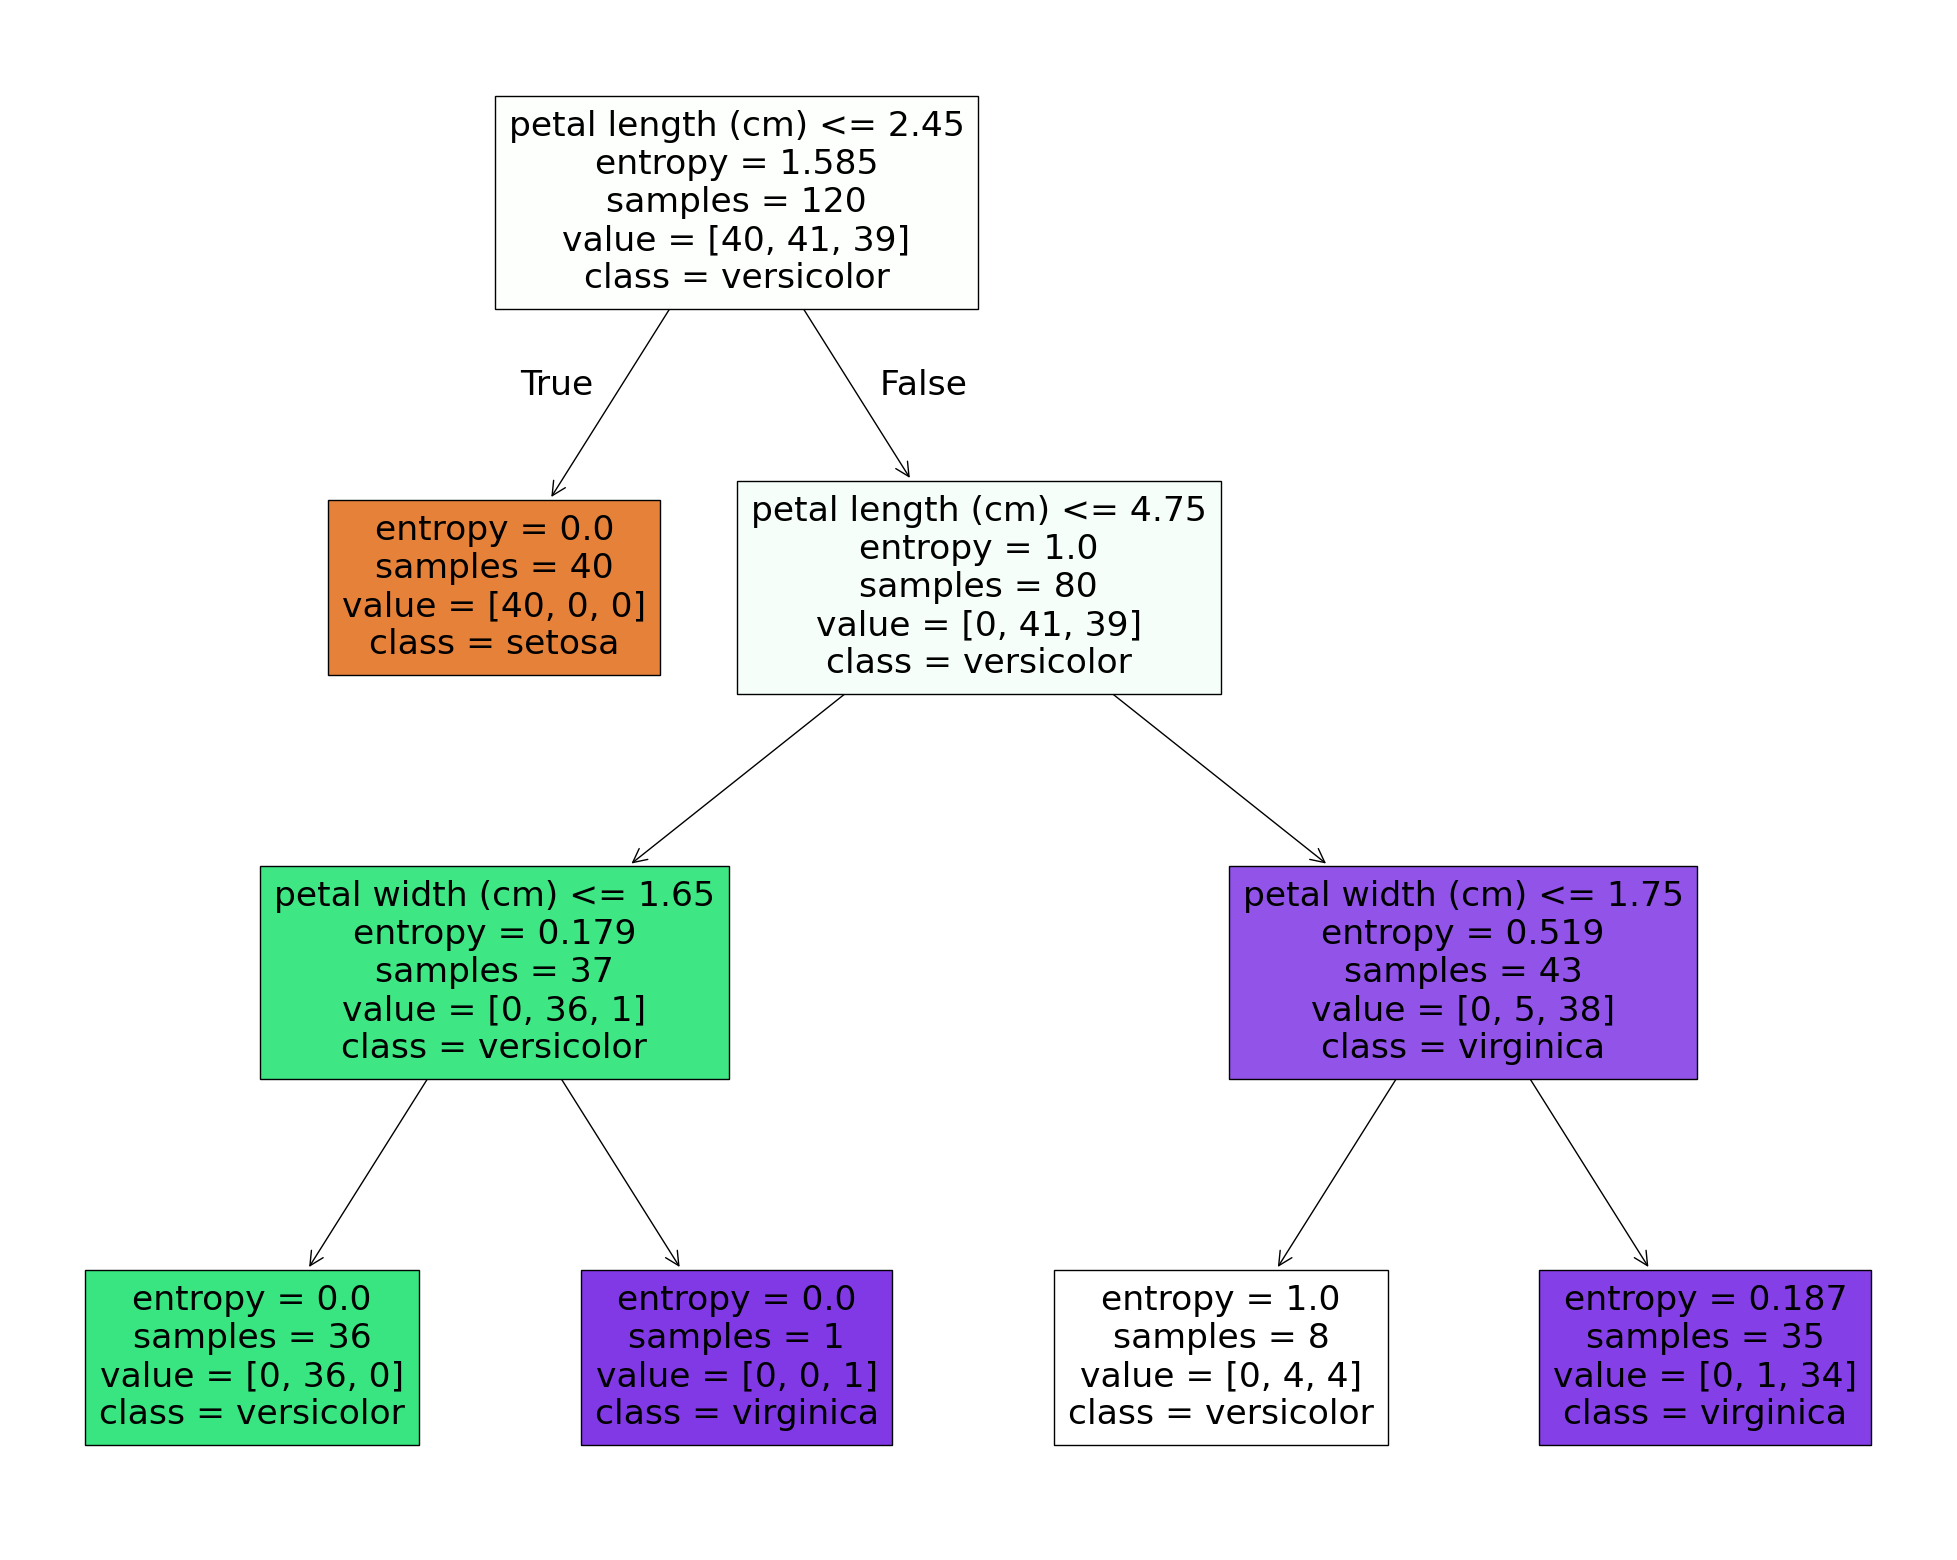

In [9]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model, 
               feature_names=X_train.columns,  
               class_names=data.target_names,
               filled=True)

In [ ]:
IF:
** Gradient Descent
THEN scale features

age    0 - 100 ---> 0 - 1
salary 0 - 300K --> 0 - 1
                    0.01

## Evaluation

In [10]:
model.score(X_test, y_test)

1.0

In [11]:
predictions = model.predict(X_test)

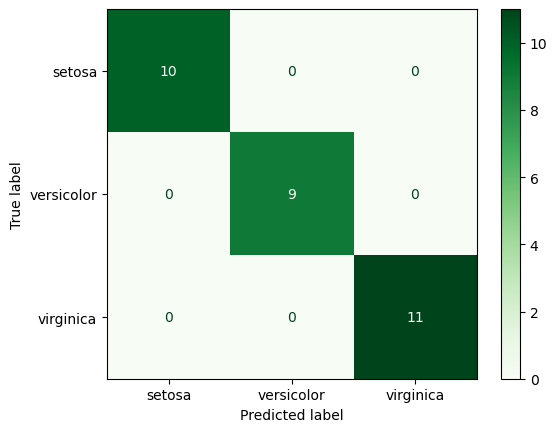

In [12]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot(cmap="Greens")
plt.show()

In [15]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions, average='weighted')

1.0

## Feature Importance

In [17]:
feature_importances = model.feature_importances_
feature_importances

array([0.        , 0.        , 0.91811431, 0.08188569])

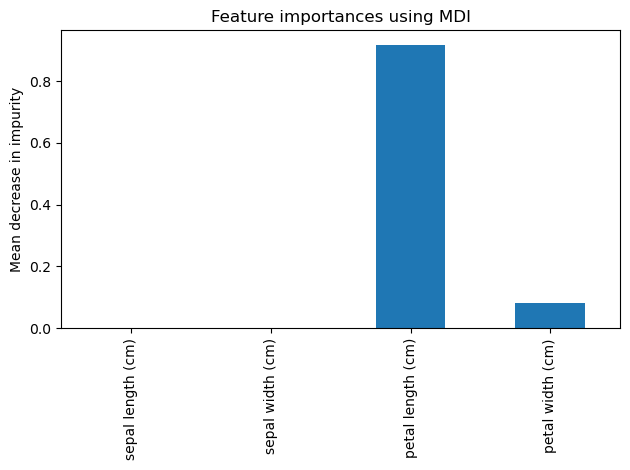

In [19]:
series = pd.Series(feature_importances, index=X_train.columns)

fig, ax = plt.subplots()
series.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()